# Convolutional Neural Network (CNN) with different kernel size for sentence classification.

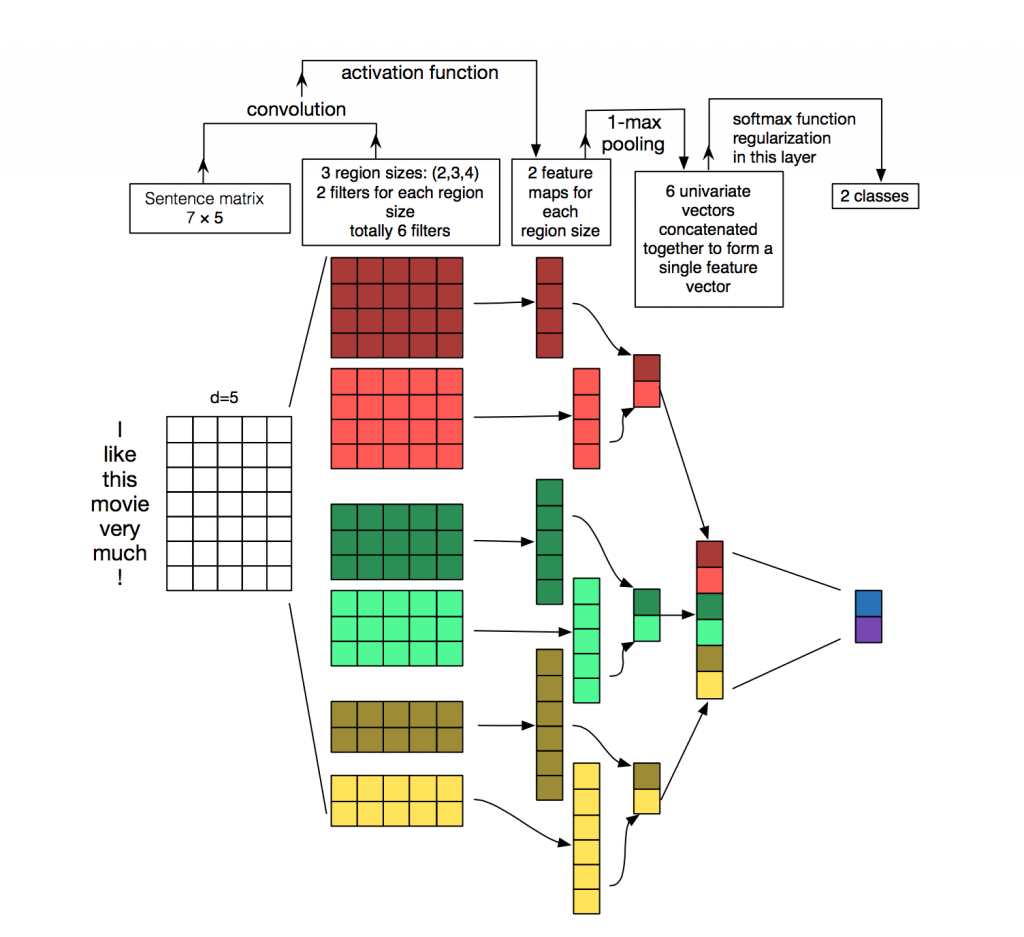

## Summary of the Model

Illustration of a Convolutional Neural Network architecture for sentence classification. 

Here, There are three filter region sizes: 2, 3 and 4, each of which has 2 filters. 
Every filter carries out convolution on the sentence matrix and creates (variable-length) feature maps. 
Then 1-max pooling is performed over each map, i.e., the largest number from each feature map is recorded. 
Thus a univariate feature vector is generated from all six maps, and these 6 features are concatenated to form a feature 
vector for the penultimate layer. The final softmax layer then receives this feature vector as input and uses it to 
classify the sentence; here we assume binary classification and hence depict two possible output states. 
Source: Zhang, Y., & Wallace, B. (2015). A Sensitivity Analysis of (and Practitioners’ Guide to) Convolutional Neural Networks for Sentence Classification.

# Coding

In [78]:
import keras
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Conv1D,Concatenate,MaxPool1D,concatenate,Flatten
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras import backend as K
from keras.engine.topology import Layer

In [79]:
from keras.datasets import imdb

In [80]:
print('Loading data...')
num_words = 1_000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,
                                                      skip_top=25)

print('Data loaded.')

print(f'{len(x_train):,} train sequences')
print(f'{len(x_test):,} test sequences')

Loading data...
Data loaded.
25,000 train sequences
25,000 test sequences


In [81]:
print("Number of categories: ", len(set(y_train)))

Number of categories:  2


In [82]:
from keras.preprocessing import sequence


In [83]:
max_words = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

In [84]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [85]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Dropout, Activation, Flatten

In [86]:
embed_size = 50 # Word vector dimension
maxlen =500 # Length of sentence selection
embedding_dimension = 100
num_words = 20000 # is the number of words in the dictionary we used to convert words to numbers
max_len = 500

def TextCNN(maxlen):
    inp = Input(shape=(maxlen,))
    x =Embedding(num_words, embedding_dimension, input_length=max_len)(inp)
    
    conv1 = Conv1D(filters=2, kernel_size=2, padding='same')(x)
    conv1 = MaxPool1D(pool_size=32)(conv1)
    
    conv2 = Conv1D(filters=2, kernel_size=3, padding='same')(x)
    conv2 = MaxPool1D(pool_size=32)(conv2)
    
    conv3 = Conv1D(filters=2, kernel_size=4, padding='same')(x)
    conv3 = MaxPool1D(pool_size=32)(conv3)
    
    cnn = concatenate([conv1, conv2, conv3], axis=-1)
    flat = Flatten()(cnn)

    x = Dense(50, activation="relu")(flat)
    x = Dropout(0.1)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
model=TextCNN(maxlen)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 500, 100)     2000000     input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 500, 2)       402         embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 500, 2)       602         embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_14 

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 116s 6ms/step - loss: 0.5386 - acc: 0.7067 - val_loss: 0.3888 - val_acc: 0.8260
Epoch 2/5
20000/20000 [==============================] - 114s 6ms/step - loss: 0.3649 - acc: 0.8428 - val_loss: 0.3751 - val_acc: 0.8336
Epoch 3/5
20000/20000 [==============================] - 127s 6ms/step - loss: 0.3226 - acc: 0.8605 - val_loss: 0.3735 - val_acc: 0.8324 acc: 0
Epoch 4/5
20000/20000 [==============================] - 122s 6ms/step - loss: 0.2890 - acc: 0.8805 - val_loss: 0.3846 - val_acc: 0.8366
Epoch 5/5
20000/20000 [==============================] - 121s 6ms/step - loss: 0.2558 - acc: 0.8953 - val_loss: 0.4052 - val_acc: 0.8266


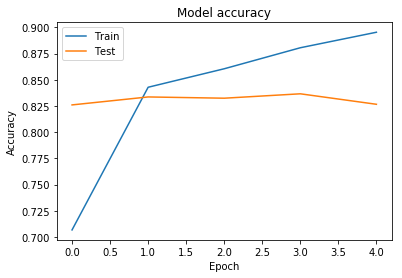

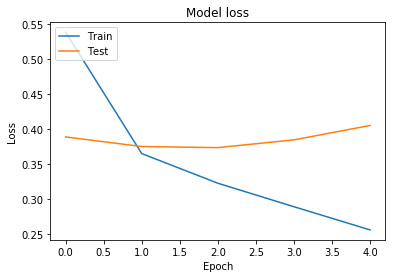

In [87]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [88]:
score = model.evaluate(x_test, 
                       y_test,
                       batch_size=32, 
                       verbose=True)

25000/25000 [==============================] - 43s 2ms/step


In [89]:
print(f'Test accuracy: {score[1]:.2%}')

Test accuracy: 82.61%


In [90]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

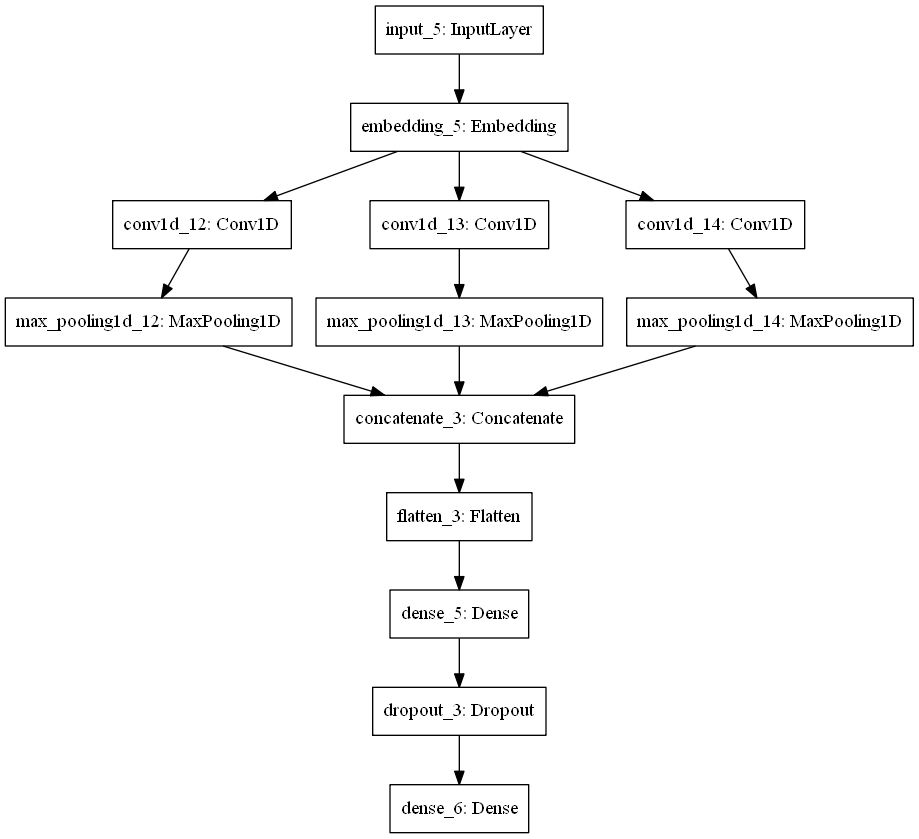

In [91]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')
Image(filename='model.png')